In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestRegressor as rf_sk

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree


In [2]:
dataframe=pd.read_csv("C:\\Users\\aitma\\Desktop\\fit.csv")
print(dataframe.isnull().sum())
dataframe

SedentaryMinutes      0
TotalSteps            0
TotalMinutesAsleep    0
TotalTimeInBed        0
Calories              0
dtype: int64


,SedentaryMinutes,TotalSteps,TotalMinutesAsleep,TotalTimeInBed,Calories
0,728,13162,327,346,1985
1,776,10735,384,407,1797
2,726,9762,412,442,1745
3,773,12669,340,367,1863
4,539,9705,700,712,1728
...,...,...,...,...,...
408,749,7174,343,360,2896
409,834,1619,503,527,1962
410,916,1831,415,423,2015
411,739,2421,516,545,2297


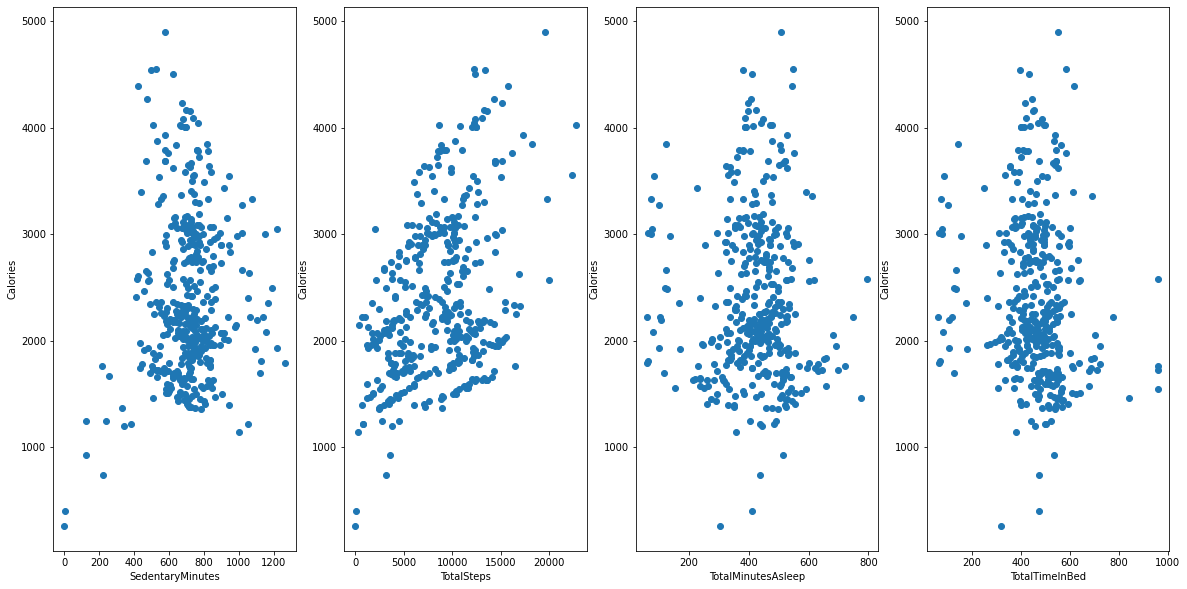

In [3]:
def plot_relationships(df, num_cols):
    variables = df.columns
    
    # assume that the dependent variable is in the last column
    dep_var = variables[-1]
    ind_var = variables[:-1]
    fig = 1
    plt.figure(figsize=(20,10))

    # Loop through all independent variables and create the scatter plot
    for i in ind_var:
        

        plt.subplot(1,4,fig)
        plt.scatter(df[i], df[dep_var])
        plt.xlabel(str(i))
        plt.ylabel(str(dep_var))
        fig +=1
      

plot_relationships(dataframe,4)

<AxesSubplot:>

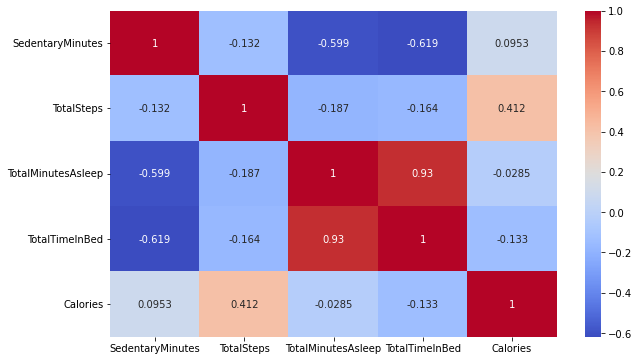

In [4]:
# Plot the correlations as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(dataframe.corr(), annot=True, cmap='coolwarm', fmt='.3g')
#If True, write the data value in each cell
#cmap for coloring map

In [5]:
def scoring(model, test_features, test_labels):
    predictions = model.predict(test_features)
    mae = mean_absolute_error(test_labels, predictions)
    mse = mean_squared_error(test_labels, predictions)
    r2 = r2_score(test_labels, predictions)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Mean Absolute Error: {:0.4f}.'.format(mae))
    print('Mean Squared Error: {:0.4f}.'.format(mse))
    print('R^2 Score = {:0.4f}.'.format(r2))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

In [6]:
X_train_temp, X_test, y_train_temp, y_test = train_test_split(dataframe.iloc[:,:-1], 
                                                              dataframe['Calories'], 
                                                              test_size=0.2, 
                                                              random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_temp, y_train_temp, 
                                                      test_size=0.25, random_state=42)

In [7]:
# scale the data with object range of 0-1
scaler = MinMaxScaler()

scaler.fit_transform(X_train)

scaler.transform(X_valid)
scaler.transform(X_test)

array([[0.63330599, 0.36764383, 0.40785908, 0.37555556],
       [0.59557014, 0.45576408, 0.57859079, 0.48777778],
       [0.6997539 , 0.0528282 , 0.5799458 , 0.49111111],
       [0.56193601, 0.54379642, 0.44715447, 0.38444444],
       [0.90730107, 0.20476421, 0.06504065, 0.05222222],
       [0.61443806, 0.31455193, 0.38617886, 0.33222222],
       [0.39294504, 0.42082363, 0.73441734, 0.63888889],
       [0.59639048, 0.49997802, 0.49186992, 0.44      ],
       [0.54060705, 0.47061926, 0.49728997, 0.41555556],
       [0.6923708 , 0.60326111, 0.09214092, 0.08444444],
       [0.3388023 , 0.35990858, 0.57181572, 0.53888889],
       [0.5561936 , 0.36171054, 0.59891599, 0.55111111],
       [0.62674323, 0.23829825, 0.47425474, 0.43222222],
       [0.58736669, 0.30769569, 0.61382114, 0.53555556],
       [0.47087777, 0.40047466, 0.63821138, 0.55222222],
       [0.73420837, 0.08996616, 0.44715447, 0.40333333],
       [0.43478261, 0.28774228, 0.6504065 , 0.55444444],
       [0.47497949, 0.8581286 ,

In [8]:
regressor = LinearRegression()
mlr = regressor.fit(X_train, y_train)

scoring(mlr, X_valid, y_valid)

Model Performance
Mean Absolute Error: 571.5923.
Mean Squared Error: 461353.1211.
R^2 Score = 0.2695.
Accuracy = 74.79%.


In [9]:
rf_regressor = rf_sk(random_state=42)
rf = rf_regressor.fit(X_train, y_train)

scoring(rf, X_valid, y_valid)

Model Performance
Mean Absolute Error: 506.9816.
Mean Squared Error: 407747.2590.
R^2 Score = 0.3544.
Accuracy = 77.49%.


In [10]:
# Define a function that compares the CV perfromance of a set of predetrmined models 
def cv_comparison(models, X, y, cv):
    cv_accuracies = pd.DataFrame()
    maes = []
    mses = []
    r2s = []
    accs = []
    
    # Loop through the models, run a CV, add the average scores to the DataFrame and the scores of all CVs to the list
    for model in models:
        mae = -np.round(cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv), 4)
        maes.append(mae)
        mae_avg = round(mae.mean(), 4)
        mse = -np.round(cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv), 4)
        mses.append(mse)
        mse_avg = round(mse.mean(), 4)
        r2 = np.round(cross_val_score(model, X, y, scoring='r2', cv=cv), 4)
        r2s.append(r2)
        r2_avg = round(r2.mean(), 4)
        acc = np.round((100 - (100 * (mae * len(X))) / sum(y)), 4)
        accs.append(acc)
        acc_avg = round(acc.mean(), 4)
        cv_accuracies[str(model)] = [mae_avg, mse_avg, r2_avg, acc_avg]
    cv_accuracies.index = ['Mean Absolute Error', 'Mean Squared Error', 'R^2', 'Accuracy']
    return cv_accuracies, maes, mses, r2s, accs

In [11]:
# Create the models to be tested
mlr_reg = LinearRegression()
rf_reg = rf_sk(random_state=42)
models = [mlr_reg, rf_reg]

# Run the Cross-Validation comparison with the models used in this analysis
comp, maes, mses, r2s, accs = cv_comparison(models, X_train_temp, y_train_temp, 4)

comp

,LinearRegression(),RandomForestRegressor(random_state=42)
Mean Absolute Error,523.9734,471.8517
Mean Squared Error,410459.2050,371613.2164
R^2,0.2813,0.3468
Accuracy,78.3106,80.4681


In [105]:
r2_comp = pd.DataFrame(r2s, index=comp.columns, columns=['1st Fold', '2nd Fold', '3rd Fold', 
                                                         '4th Fold'])

r2_comp['Average'] = np.round(r2_comp.mean(axis=1),4)

r2_comp


,1st Fold,2nd Fold,3rd Fold,4th Fold,Average
LinearRegression(),0.2437,0.2679,0.3072,0.3063,0.2813
RandomForestRegressor(random_state=42),0.4913,0.2705,0.2859,0.3394,0.3468


In [110]:
dataframe.columns

Index(['SedentaryMinutes', 'TotalSteps', 'TotalMinutesAsleep',
       'TotalTimeInBed', 'Calories'],
      dtype='object')

In [117]:
ex_data=dataframe[['SedentaryMinutes', 'TotalSteps', 'TotalMinutesAsleep',
       'TotalTimeInBed']]

In [118]:
rf_regressor = rf_sk(random_state=42)
rf = rf_regressor.fit(X_train, y_train)
predicted_calo=rf.predict(ex_data)
ex_data["predicted_calo"]=predicted_calo
ex_data["calories"]=dataframe[["Calories"]]
ex_data


,SedentaryMinutes,TotalSteps,TotalMinutesAsleep,TotalTimeInBed,predicted_calo,calories
0,728,13162,327,346,2336.49,1985
1,776,10735,384,407,2297.54,1797
2,726,9762,412,442,2092.03,1745
3,773,12669,340,367,2237.06,1863
4,539,9705,700,712,1905.23,1728
...,...,...,...,...,...,...
408,749,7174,343,360,2642.96,2896
409,834,1619,503,527,1701.52,1962
410,916,1831,415,423,1950.61,2015
411,739,2421,516,545,2022.37,2297
